In [95]:
import pandas as pd
from nilearn import plotting 
import matplotlib.pyplot as plt
import numpy as np

from nilearn import datasets
from nilearn import surface
from nilearn import image

import seaborn as sns
sns.set(style="whitegrid", font="FreeSans")

# Task fMRI data analysis

First, let's load the data

In [16]:
data = pd.read_csv("../LL_model2.csv")
data

,Unnamed: 0,HCPID,alpha,proc.temp,proc.LL,decay,decl.temp,decl.LL,best.model,diff.LL
0,0,153429_fnca,0.010252,0.056150,-41.874283,0.269881,2.000000,-43.309030,Procedural,1.434746
1,1,108828_fnca,0.617891,0.677361,-36.766818,0.590105,2.000000,-40.442898,Procedural,3.676080
2,2,122620_fnca,0.053821,0.933937,-44.295309,0.010016,2.000000,-44.859627,Procedural,0.564318
3,3,140824_fnca,0.368579,0.707357,-40.217810,0.122935,1.931400,-43.930164,Procedural,3.712353
4,4,141826_fnca,0.016432,0.037609,-57.717707,0.010031,2.000000,-77.308244,Procedural,19.590536
...,...,...,...,...,...,...,...,...,...,...
194,194,113619_fnca,0.067032,0.113692,-74.253171,0.010044,2.000000,-78.568028,Procedural,4.314857
195,195,117324_fnca,0.047748,0.095087,-45.265350,0.010015,2.000000,-72.084469,Procedural,26.819119
196,196,144226_fnca,0.978894,1.702451,-42.203771,1.999950,1.999928,-40.765972,Declarative,-1.437799
197,197,994273_fnca,0.010000,0.011155,-68.614196,0.010020,2.000000,-85.325443,Procedural,16.711247


For some individuals, we have no reliable task fMRI data. We need to exclude them

In [17]:
missing = pd.read_csv("fmri_missing.csv")
missing

,HCPID,DataAvailable
0,150523,No
1,134234,No
2,133982,No


In [18]:
missing_participants = ["%d_fnca" % x for x in missing.HCPID]
missing_participants

['150523_fnca', '134234_fnca', '133982_fnca']

In [19]:
available_data = data[~ data['HCPID'].isin(missing_participants)]
available_data

,Unnamed: 0,HCPID,alpha,proc.temp,proc.LL,decay,decl.temp,decl.LL,best.model,diff.LL
0,0,153429_fnca,0.010252,0.056150,-41.874283,0.269881,2.000000,-43.309030,Procedural,1.434746
1,1,108828_fnca,0.617891,0.677361,-36.766818,0.590105,2.000000,-40.442898,Procedural,3.676080
2,2,122620_fnca,0.053821,0.933937,-44.295309,0.010016,2.000000,-44.859627,Procedural,0.564318
3,3,140824_fnca,0.368579,0.707357,-40.217810,0.122935,1.931400,-43.930164,Procedural,3.712353
4,4,141826_fnca,0.016432,0.037609,-57.717707,0.010031,2.000000,-77.308244,Procedural,19.590536
...,...,...,...,...,...,...,...,...,...,...
194,194,113619_fnca,0.067032,0.113692,-74.253171,0.010044,2.000000,-78.568028,Procedural,4.314857
195,195,117324_fnca,0.047748,0.095087,-45.265350,0.010015,2.000000,-72.084469,Procedural,26.819119
196,196,144226_fnca,0.978894,1.702451,-42.203771,1.999950,1.999928,-40.765972,Declarative,-1.437799
197,197,994273_fnca,0.010000,0.011155,-68.614196,0.010020,2.000000,-85.325443,Procedural,16.711247


Now, we separate participants in two groups, Procedural and Declarative, beased on which model best fits their choices.

In [20]:
procedural = available_data[available_data['best.model'] == "Procedural"]
procedural

,Unnamed: 0,HCPID,alpha,proc.temp,proc.LL,decay,decl.temp,decl.LL,best.model,diff.LL
0,0,153429_fnca,0.010252,0.056150,-41.874283,0.269881,2.000000,-43.309030,Procedural,1.434746
1,1,108828_fnca,0.617891,0.677361,-36.766818,0.590105,2.000000,-40.442898,Procedural,3.676080
2,2,122620_fnca,0.053821,0.933937,-44.295309,0.010016,2.000000,-44.859627,Procedural,0.564318
3,3,140824_fnca,0.368579,0.707357,-40.217810,0.122935,1.931400,-43.930164,Procedural,3.712353
4,4,141826_fnca,0.016432,0.037609,-57.717707,0.010031,2.000000,-77.308244,Procedural,19.590536
...,...,...,...,...,...,...,...,...,...,...
192,192,128329_fnca,0.131475,0.812007,-43.662517,0.282078,1.960731,-44.119291,Procedural,0.456774
193,193,155635_fnca,0.010000,0.029775,-59.234072,0.010030,2.000000,-77.249759,Procedural,18.015687
194,194,113619_fnca,0.067032,0.113692,-74.253171,0.010044,2.000000,-78.568028,Procedural,4.314857
195,195,117324_fnca,0.047748,0.095087,-45.265350,0.010015,2.000000,-72.084469,Procedural,26.819119


In [21]:
declarative = available_data[available_data['best.model'] == "Declarative"]
declarative

,Unnamed: 0,HCPID,alpha,proc.temp,proc.LL,decay,decl.temp,decl.LL,best.model,diff.LL
10,10,131924_fnca,0.010000,0.999087,-44.348115,0.010040,2.000000,-44.274910,Declarative,-0.073205
14,14,157336_fnca,0.740793,1.999933,-72.050874,0.599319,1.999980,-60.254660,Declarative,-11.796214
16,16,169343_fnca,0.010000,0.101717,-42.047712,0.010000,0.594689,-40.673727,Declarative,-1.373985
17,17,153025_fnca,0.571104,2.000000,-43.795976,0.047833,0.732037,-43.646018,Declarative,-0.149958
21,21,155231_fnca,0.654601,1.999931,-71.220348,0.635325,2.000000,-59.240991,Declarative,-11.979356
24,24,140117_fnca,0.750419,2.000000,-44.264337,0.567660,2.000000,-43.813315,Declarative,-0.451022
27,27,111413_fnca,1.012874,0.708492,-33.817116,2.000000,1.380880,-32.835461,Declarative,-0.981654
29,29,167036_fnca,0.077190,0.423564,-43.280314,1.212372,2.000000,-42.943125,Declarative,-0.337189
42,42,173940_fnca,0.013994,1.225580,-44.336970,0.393688,2.000000,-44.190094,Declarative,-0.146877
45,45,106319_fnca,0.226012,1.168401,-43.789731,0.614195,2.000000,-43.395058,Declarative,-0.394673


Finally, we save the corresponding log-likelihoods as AFNI's 1D datasets, to be used as weights in the t-test.

In [22]:
proceduralLL = procedural['diff.LL']
proceduralLL.to_csv("proceduralLL.1d", index=False, header=False)

declarativeLL = -1 * declarative['diff.LL']
declarativeLL.to_csv("declarativeLL.1d", index=False, header=False)

Write AFNI code

In [23]:
image_path = "/projects/HCP/GAMBLING/%s/results/con_0003.nii \ "
with open("weighted_ttest.sh", "w") as f:
    f.write("~/abin/3dttest++ -setA \ \n")
    for p in procedural.HCPID:
        pid = p[0:6]
        f.write(image_path % pid + "\n")
        
    f.write("-setB \ \n")
    for p in declarative.HCPID:
        pid = p[0:6]
        f.write(image_path % pid + "\n")
        
    f.write("-setweightA proceduralLL.1d \ \n")
    f.write("-setweightB declarativeLL.1d \ \n")
    
    f.write("\n\n")
    
    f.write("3dAFNItoNIFTI -prefix weighted_results_win_gt_loss.nii TTnew+tlrc'[1]'")

# Visualization

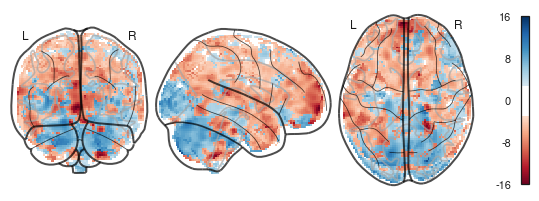

In [96]:
plotting.plot_glass_brain("weighted_results_win_gt_loss.nii", threshold=3, cmap="RdBu", colorbar=True, plot_abs=False)

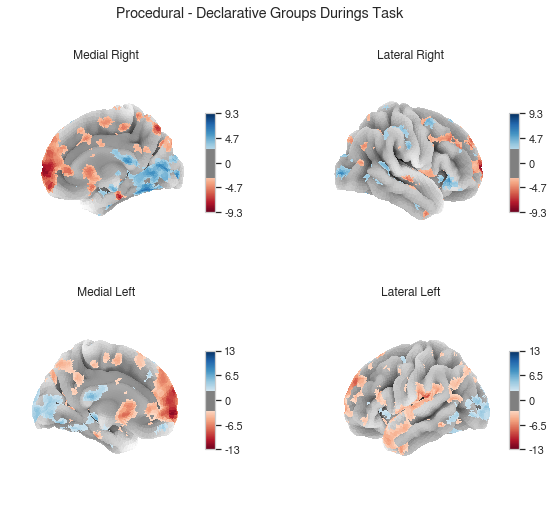

In [102]:
t_thr = 2.7

stat_img=image.load_img("weighted_results_win_gt_loss.nii")

fsaverage = datasets.fetch_surf_fsaverage()
texture_right = surface.vol_to_surf(stat_img, fsaverage.pial_right)
texture_left = surface.vol_to_surf(stat_img, fsaverage.pial_left)

fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(10, 8))

plotting.plot_surf_stat_map(
    fsaverage.pial_right, texture_right, hemi='left',
    title='Medial Right', colorbar=True, axes=axs[0,0],
    threshold=t_thr, bg_map=fsaverage.sulc_right, cmap="RdBu", 
)

plotting.plot_surf_stat_map(
    fsaverage.pial_right, texture_right, hemi='right',
    title='Lateral Right', colorbar=True, axes=axs[0,1],
    threshold=t_thr, bg_map=fsaverage.sulc_right, cmap="RdBu", 
)


plotting.plot_surf_stat_map(
    fsaverage.pial_left, texture_left, hemi='right',
    title='Medial Left', colorbar=True, axes=axs[1,0],
    threshold=t_thr, bg_map=fsaverage.sulc_left, cmap="RdBu", 
)

k=plotting.plot_surf_stat_map(
    fsaverage.pial_left, texture_left, hemi='left',
    title='Lateral Left', colorbar=True, axes=axs[1,1],
    threshold=t_thr, bg_map=fsaverage.sulc_left, cmap="RdBu", 
)
#plt.tight_layout()
plt.suptitle("Procedural - Declarative Groups Durings Task") 
plt.savefig("pial_composite.png")
plt.show()

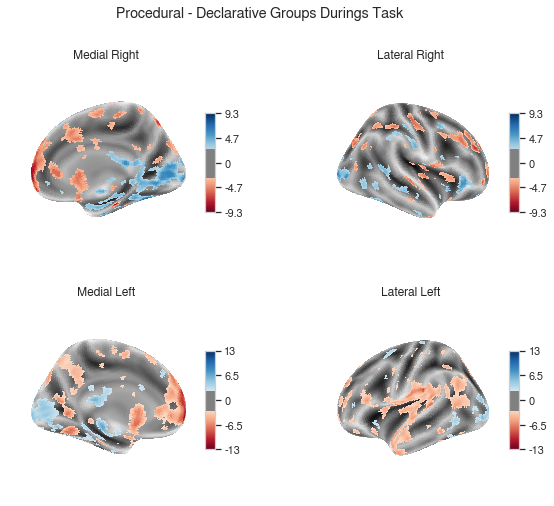

In [103]:

fsaverage = datasets.fetch_surf_fsaverage()
texture_right = surface.vol_to_surf(stat_img, fsaverage.pial_right)
texture_left = surface.vol_to_surf(stat_img, fsaverage.pial_left)

fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(10, 8))

plotting.plot_surf_stat_map(
    fsaverage.infl_right, texture_right, hemi='left',
    title='Medial Right', colorbar=True, axes=axs[0,0],
    threshold=t_thr, bg_map=fsaverage.sulc_right, cmap="RdBu", 
)

plotting.plot_surf_stat_map(
    fsaverage.infl_right, texture_right, hemi='right',
    title='Lateral Right', colorbar=True, axes=axs[0,1],
    threshold=t_thr, bg_map=fsaverage.sulc_right, cmap="RdBu", 
)


plotting.plot_surf_stat_map(
    fsaverage.infl_left, texture_left, hemi='right',
    title='Medial Left', colorbar=True, axes=axs[1,0],
    threshold=t_thr, bg_map=fsaverage.sulc_left, cmap="RdBu", 
)

k=plotting.plot_surf_stat_map(
    fsaverage.infl_left, texture_left, hemi='left',
    title='Lateral Left', colorbar=True, axes=axs[1,1],
    threshold=t_thr, bg_map=fsaverage.sulc_left, cmap="RdBu", 
)
#plt.tight_layout()
plt.suptitle("Procedural - Declarative Groups Durings Task") 
plt.savefig("infl_composite.png")
plt.show()

Diaply some anatomical contours

/tmp/ipykernel_124879/4275646953.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


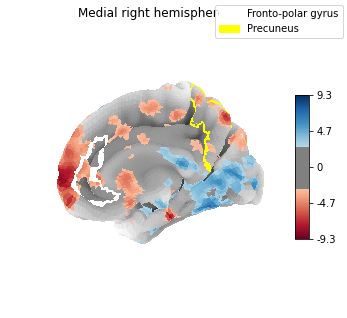

In [71]:
texture_right_pial = surface.vol_to_surf(stat_img, fsaverage.pial_right)
atlas = datasets.fetch_atlas_surf_destrieux()
#atlas = datasets.fetch_atlas_juelich("maxprob-thr25-2mm")
parcellation = atlas['map_right']

# these are the regions we want to outline
regions_dict = {b'G_and_S_cingul-Ant' : "Fronto-polar gyrus",
                b'G_precuneus' : "Precuneus"}
                


regions_indices = [
    np.where(np.array(atlas['labels']) == region)[0][0]
    for region in regions_dict
]

labels = list(regions_dict.values())

fig = plotting.plot_surf_stat_map(
    fsaverage.pial_right, texture_right_pial, hemi='left',
    title='Medial right hemisphere', colorbar=True,
    threshold=2.7, bg_map=fsaverage.sulc_right, cmap="RdBu", 
)

plotting.plot_surf_contours(fsaverage.infl_right, parcellation, labels=labels,
                            figure=fig, levels=regions_indices, colors=["white", "yellow"],
                            legend=True)



fig.show()


In [27]:
atlas

{'labels': [b'Unknown',
  b'G_and_S_frontomargin',
  b'G_and_S_occipital_inf',
  b'G_and_S_paracentral',
  b'G_and_S_subcentral',
  b'G_and_S_transv_frontopol',
  b'G_and_S_cingul-Ant',
  b'G_and_S_cingul-Mid-Ant',
  b'G_and_S_cingul-Mid-Post',
  b'G_cingul-Post-dorsal',
  b'G_cingul-Post-ventral',
  b'G_cuneus',
  b'G_front_inf-Opercular',
  b'G_front_inf-Orbital',
  b'G_front_inf-Triangul',
  b'G_front_middle',
  b'G_front_sup',
  b'G_Ins_lg_and_S_cent_ins',
  b'G_insular_short',
  b'G_occipital_middle',
  b'G_occipital_sup',
  b'G_oc-temp_lat-fusifor',
  b'G_oc-temp_med-Lingual',
  b'G_oc-temp_med-Parahip',
  b'G_orbital',
  b'G_pariet_inf-Angular',
  b'G_pariet_inf-Supramar',
  b'G_parietal_sup',
  b'G_postcentral',
  b'G_precentral',
  b'G_precuneus',
  b'G_rectus',
  b'G_subcallosal',
  b'G_temp_sup-G_T_transv',
  b'G_temp_sup-Lateral',
  b'G_temp_sup-Plan_polar',
  b'G_temp_sup-Plan_tempo',
  b'G_temporal_inf',
  b'G_temporal_middle',
  b'Lat_Fis-ant-Horizont',
  b'Lat_Fis-ant-V

In [28]:
parcellation

array([70, 57, 28, ..., 37, 37, 51], dtype=int32)